# Ukraine war tweets

![alternatvie text](https://cdn.sanity.io/images/0vv8moc6/psychtimes/fa2efd3df4dd00eb8c1a6306a0a454a3564ad79e-5833x2143.jpg?fit=crop&auto=format)

## Introduction

TEXT

## About data

TEXT

## Data quality assessment

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

import requests

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
west = pd.read_csv(r'C:\Users\Asus\Desktop\DB\W\occ\western.csv', on_bad_lines='skip', delimiter='\t', encoding='latin1')
r_trolls = pd.read_csv(r'C:\Users\Asus\Desktop\DB\W\rf\russian_propaganda_tweets.csv', on_bad_lines='skip', delimiter='\t', encoding='latin1')

In [23]:
west.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.496640e+18,1.496640e+18,2022-02-24 02:01:32 GTB Standard Time,2/24/2022,2:01:32,300,2.388075e+09,liveuamap,Liveuamap,"{'type': 'Point', 'coordinates': [40.74881, -7...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.496640e+18,1.496640e+18,2022-02-24 02:02:33 GTB Standard Time,2/24/2022,2:02:33,300,2.388075e+09,liveuamap,Liveuamap,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [24]:
west.shape

(16727, 36)

In [25]:
r_trolls.shape

(22602, 36)

In [26]:
west.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [27]:
west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16727 entries, 0 to 16726
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16727 non-null  float64
 1   conversation_id  16727 non-null  float64
 2   created_at       16727 non-null  object 
 3   date             16727 non-null  object 
 4   time             16727 non-null  object 
 5   timezone         16727 non-null  int64  
 6   user_id          16727 non-null  float64
 7   username         16727 non-null  object 
 8   name             16727 non-null  object 
 9   place            531 non-null    object 
 10  tweet            16727 non-null  object 
 11  language         16727 non-null  object 
 12  mentions         16727 non-null  object 
 13  urls             16727 non-null  object 
 14  photos           16727 non-null  object 
 15  replies_count    16727 non-null  int64  
 16  retweets_count   16727 non-null  int64  
 17  likes_count 

In [28]:
r_trolls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22602 entries, 0 to 22601
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               22602 non-null  float64
 1   conversation_id  22602 non-null  float64
 2   created_at       22602 non-null  object 
 3   date             22602 non-null  object 
 4   time             22602 non-null  object 
 5   timezone         22602 non-null  int64  
 6   user_id          22602 non-null  float64
 7   username         22602 non-null  object 
 8   name             22602 non-null  object 
 9   place            0 non-null      float64
 10  tweet            22602 non-null  object 
 11  language         22602 non-null  object 
 12  mentions         22602 non-null  object 
 13  urls             22602 non-null  object 
 14  photos           22602 non-null  object 
 15  replies_count    22602 non-null  int64  
 16  retweets_count   22602 non-null  int64  
 17  likes_count 

## Data transformation

### Deleting biased accounts from tweets list....???????

In [304]:
west['username'].unique()

array(['liveuamap', 'thestudyofwar', 'the_lookout_n', 'deepnetanon',
       'cen4infores', 'konrad_muzyka', 'hannaliubakova', 'kylejglen',
       'uaweapons', 'kyivindependent', 'motolkohelp', 'shashj', 'ralee85',
       'citeam_en', 'oalexanderdk', 'kofmanmichael', 'osinttechnical',
       'nexta_tv', 'marqs__'], dtype=object)

In [305]:
len(west['username'].unique())

19

In [30]:
r_trolls['username'].unique()

array(['tinkzorg', 'mfa_russia', 'russianembassy', 'levi_godman',
       'colonelhomsi', 'lumpylouish', 'alexxa1721', 'garlandnixon',
       'thesiriusreport', 'realgonzalolira', 'mission_russian', 'rt_com',
       'russ_warrior', 'jacksonhinklle', 'russiaun', 'rwapodcast',
       'gbazov', 'angieskys', 'taurevanime', 'ninabyzantina', 'geromanat',
       'a__alimov', 'rusembusa', 'snmilitary', 'pelmenipusha'],
      dtype=object)

In [306]:
len(r_trolls['username'].unique())

25

In [307]:
new_list = ['tinkzorg', 'levi_godman', 'colonelhomsi', 'lumpylouish', 'garlandnixon', 'thesiriusreport',
            'realgonzalolira', 'rt_com', 'russ_warrior', 'jacksonhinklle', 'rwapodcast', 'gbazov', 'angieskys', 'taurevanime',
     'ninabyzantina', 'geromanat', 'a__alimov', 'snmilitary', 'pelmenipusha']

In [308]:
r_trolls = r_trolls[r_trolls['username'].isin(new_list)]

In [309]:
r_trolls['username'].unique()

array(['levi_godman', 'colonelhomsi', 'lumpylouish', 'tinkzorg',
       'garlandnixon', 'thesiriusreport', 'realgonzalolira', 'rt_com',
       'russ_warrior', 'jacksonhinklle', 'rwapodcast', 'gbazov',
       'angieskys', 'taurevanime', 'ninabyzantina', 'geromanat',
       'a__alimov', 'snmilitary', 'pelmenipusha'], dtype=object)

In [311]:
len(r_trolls['username'].unique())

19

In [312]:
r_trolls.shape

(17610, 20)

### Remove language != english

In [313]:
# delete language != en
print("Number of records  before filtering: ", len(west.index))
west = west.drop(west.index[west['language'] != 'en'])
print("Number of records after filtering: ", len(west.index))
print()
print("Number of records  before filtering: ", len(r_trolls.index))
r_trolls = r_trolls.drop(r_trolls.index[r_trolls['language'] != 'en'])
print("Number of records after filtering: ", len(r_trolls.index))

Number of records  before filtering:  14593
Number of records after filtering:  14593

Number of records  before filtering:  17610
Number of records after filtering:  17610


### Order by date

In [314]:
west.sort_values(by = 'created_at', ascending = True, inplace = True)
r_trolls.sort_values(by = 'created_at', ascending = True, inplace = True)

### Atribute selection

In [315]:
west = west[['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet', 'language', 'mentions', 'photos', 
            'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'link', 'retweet', 'video', 'reply_to']]
r_trolls = r_trolls[['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet', 'language', 'mentions', 'photos', 
            'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'link', 'retweet', 'video', 'reply_to']]

In [316]:
west.columns

Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'mentions', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')

In [317]:
west.shape

(14593, 18)

In [318]:
r_trolls.shape

(17610, 18)

### Views

The clearest ratio for measuring views based on likes is views = 4%, that's 4 Likes for every 100 views.

In [319]:
def categorise(row):  
    if row['likes_count'] > 0:
        return int(row['likes_count']/4*100)
    else:
        return 0
    
west['views_count'] = west.apply(lambda row: categorise(row), axis=1)
r_trolls['views_count'] = r_trolls.apply(lambda row: categorise(row), axis=1)

## Exploratory analysis & descriptive statistics

In [320]:
west.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,14593.0,1.508645e+18,7.917524e+15,1.496640e+18,1.501530e+18,1.508160e+18,1.515770e+18,1.523810e+18
replies_count,14593.0,6.748804e+01,1.881639e+02,0.000000e+00,2.000000e+00,1.600000e+01,5.600000e+01,5.055000e+03
retweets_count,14593.0,5.126613e+02,1.346347e+03,0.000000e+00,1.400000e+01,1.060000e+02,4.260000e+02,4.060400e+04
likes_count,14593.0,2.792935e+03,7.303298e+03,0.000000e+00,6.100000e+01,5.270000e+02,2.682000e+03,2.866200e+05
video,14593.0,4.584390e-01,4.982868e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
views_count,14593.0,6.982338e+04,1.825825e+05,0.000000e+00,1.525000e+03,1.317500e+04,6.705000e+04,7.165500e+06


In [321]:
r_trolls.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,17610.0,1.510699e+18,8.076793e+15,1.496830e+18,1.503440e+18,1.511060e+18,1.518628e+18,1.523820e+18
replies_count,17610.0,1.592896e+01,4.267080e+01,0.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01,1.623000e+03
retweets_count,17610.0,5.331215e+01,1.695785e+02,0.000000e+00,0.000000e+00,4.000000e+00,4.100000e+01,5.398000e+03
likes_count,17610.0,2.439776e+02,6.059585e+02,0.000000e+00,3.000000e+00,4.600000e+01,2.180000e+02,1.449500e+04
video,17610.0,2.136286e-01,4.098792e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
views_count,17610.0,6.099439e+03,1.514896e+04,0.000000e+00,7.500000e+01,1.150000e+03,5.450000e+03,3.623750e+05


In [322]:
print("###### west - likes mean ---->", round(np.mean(west['likes_count']), 2))
print("###### west - likes median ---->", int(np.median(west['likes_count'])))
print("###### west - likes standard deviation ---->", round(np.std(west['likes_count']), 2))
print()
print("###### west - retweets mean ---->", round(np.mean(west['retweets_count']), 2))
print("###### west - retweets median ---->", round(np.median(west['retweets_count']), 2))
print("###### west - retweets standarnd deviation ---->", round(np.std(west['retweets_count']), 2))
print()
print("###### west - replies mean ---->", round(np.mean(west['replies_count']), 2))
print("###### west - replies median ---->", round(np.median(west['replies_count']), 2))
print("###### west - replies standard deviation ---->", round(np.std(west['replies_count']), 2))
print()
print("###### west - views mean ---->", round(np.mean(west['views_count']), 2))
print("###### west - views median ---->", round(np.median(west['views_count']), 2))
print("###### west - views standard deviation ---->", round(np.std(west['views_count']), 2))
print()
print()
print()
print("###### r_trolls - likes mean ---->", round(np.mean(r_trolls['likes_count']), 2))
print("###### r_trolls - likes median ---->", int(np.median(r_trolls['likes_count'])))
print("###### r_trolls - likes standard deviation ---->", round(np.std(r_trolls['likes_count']), 2))
print()
print("###### r_trolls - retweets mean ---->", round(np.mean(r_trolls['retweets_count']), 2))
print("###### r_trolls - retweets median ---->", round(np.median(r_trolls['retweets_count']), 2))
print("###### r_trolls - retweets standarnd deviation ---->", round(np.std(r_trolls['retweets_count']), 2))
print()
print("###### r_trolls - replies mean ---->", round(np.mean(r_trolls['replies_count']), 2))
print("###### r_trolls - replies median ---->", round(np.median(r_trolls['replies_count']), 2))
print("###### r_trolls - replies standard deviation ---->", round(np.std(r_trolls['replies_count']), 2))
print()
print("###### r_trolls - views mean ---->", round(np.mean(r_trolls['views_count']), 2))
print("###### r_trolls - views median ---->", round(np.median(r_trolls['views_count']), 2))
print("###### r_trolls - views standard deviation ---->", round(np.std(r_trolls['views_count']), 2))

###### west - likes mean ----> 2792.94
###### west - likes median ----> 527
###### west - likes standard deviation ----> 7303.05

###### west - retweets mean ----> 512.66
###### west - retweets median ----> 106.0
###### west - retweets standarnd deviation ----> 1346.3

###### west - replies mean ----> 67.49
###### west - replies median ----> 16.0
###### west - replies standard deviation ----> 188.16

###### west - views mean ----> 69823.38
###### west - views median ----> 13175.0
###### west - views standard deviation ----> 182576.2



###### r_trolls - likes mean ----> 243.98
###### r_trolls - likes median ----> 46
###### r_trolls - likes standard deviation ----> 605.94

###### r_trolls - retweets mean ----> 53.31
###### r_trolls - retweets median ----> 4.0
###### r_trolls - retweets standarnd deviation ----> 169.57

###### r_trolls - replies mean ----> 15.93
###### r_trolls - replies median ----> 2.0
###### r_trolls - replies standard deviation ----> 42.67

###### r_trolls - views me

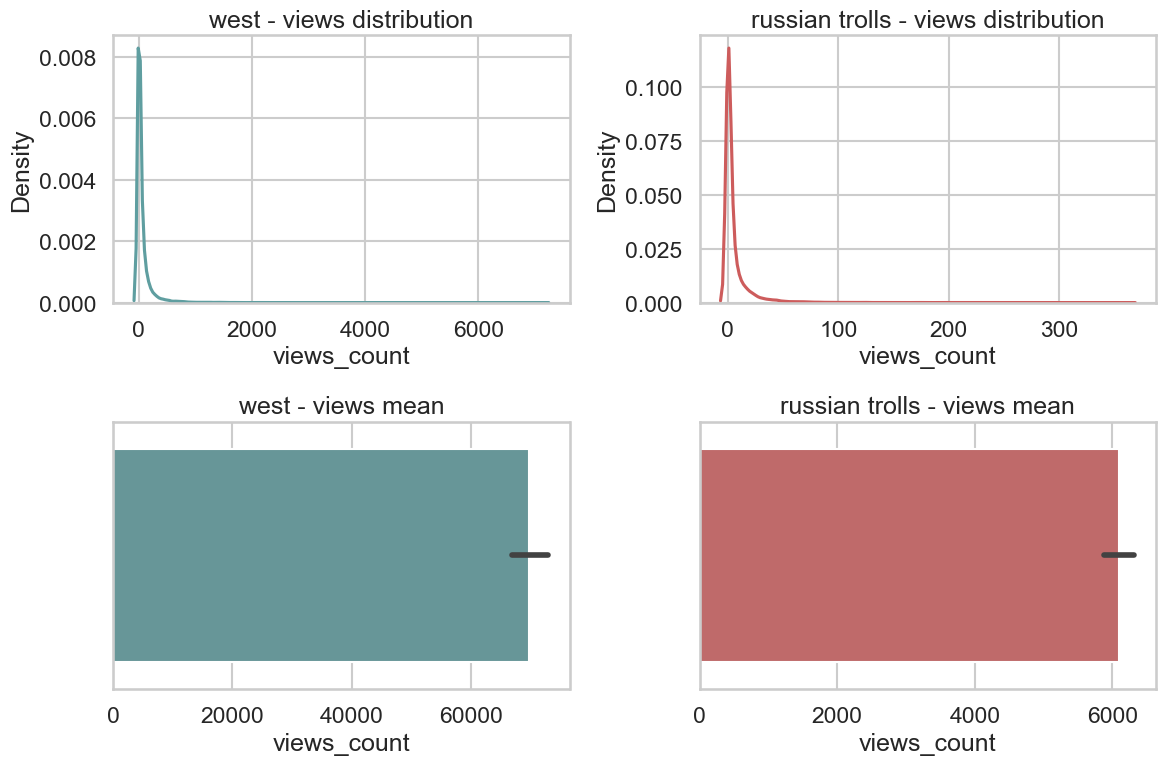

In [323]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

w_copy = west.copy()
r_copy = r_trolls.copy()
w_copy['views_count'] = w_copy['views_count'].apply(lambda x:x/1000) #normalization
r_copy['views_count'] = r_trolls['views_count'].apply(lambda x:x/1000) #normalization

w = sns.kdeplot(w_copy['views_count'], color = 'cadetblue', ax=axs[0,0])
w.set_title("west - views distribution")
r = sns.kdeplot(r_copy['views_count'], color = 'indianred', ax=axs[0,1])
r.set_title("russian trolls - views distribution")

w1 = sns.barplot(x='views_count', data=west, color = 'cadetblue', ax=axs[1,0])
w1.set_title("west - views mean")
r1 = sns.barplot(x='views_count', data=r_trolls, color = 'indianred', ax=axs[1,1])
r1.set_title("russian trolls - views mean")
plt.tight_layout()

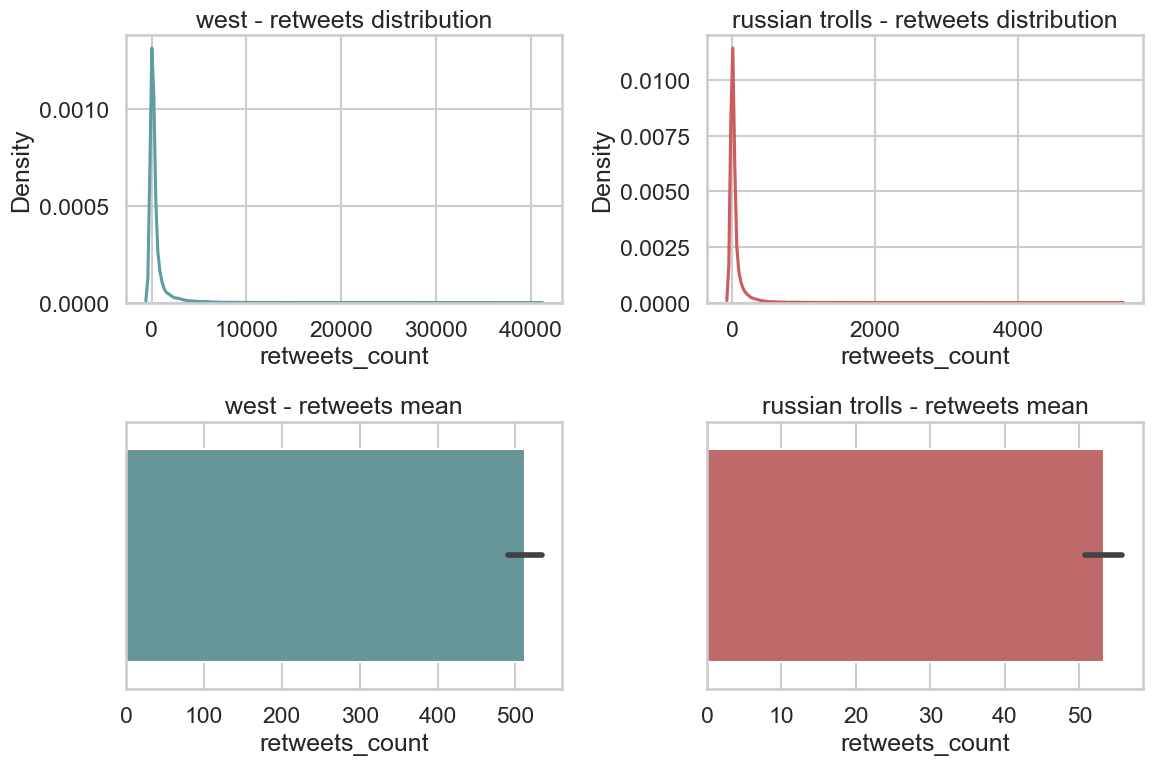

In [324]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

w = sns.kdeplot(w_copy['retweets_count'], color = 'cadetblue', ax=axs[0,0])
w.set_title("west - retweets distribution")
r = sns.kdeplot(r_copy['retweets_count'], color = 'indianred', ax=axs[0,1])
r.set_title("russian trolls - retweets distribution")

w1 = sns.barplot(x='retweets_count', data=west, color = 'cadetblue', ax=axs[1,0])
w1.set_title("west - retweets mean")
r1 = sns.barplot(x='retweets_count', data=r_trolls, color = 'indianred', ax=axs[1,1])
r1.set_title("russian trolls - retweets mean")
plt.tight_layout()

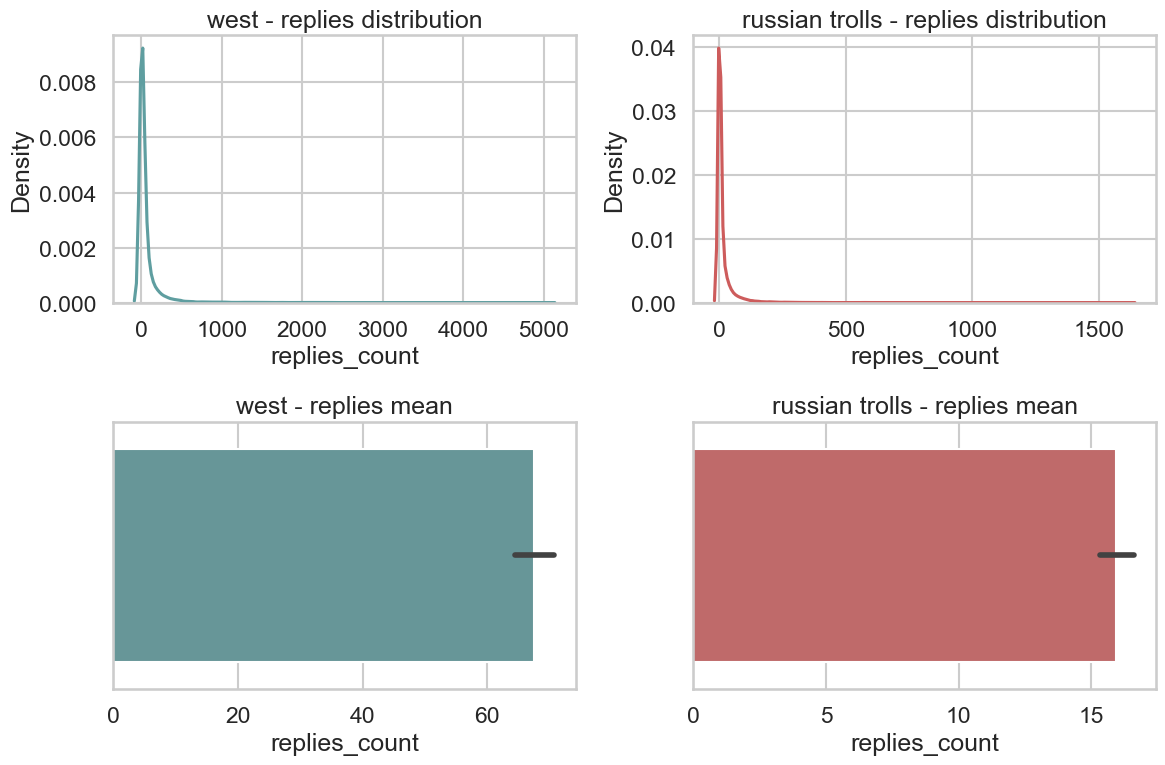

In [325]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

w = sns.kdeplot(w_copy['replies_count'], color = 'cadetblue', ax=axs[0,0])
w.set_title("west - replies distribution")
r = sns.kdeplot(r_copy['replies_count'], color = 'indianred', ax=axs[0,1])
r.set_title("russian trolls - replies distribution")

w1 = sns.barplot(x='replies_count', data=west, color = 'cadetblue', ax=axs[1,0])
w1.set_title("west - replies mean")
r1 = sns.barplot(x='replies_count', data=r_trolls, color = 'indianred', ax=axs[1,1])
r1.set_title("russian trolls - replies mean")
plt.tight_layout()

### Accounts exploring

In [326]:
w_tweets_count = west.groupby('username').count().sort_values(by = 'tweet', ascending = False)
r_tweets_count = r_trolls.groupby('username').count().sort_values(by = 'tweet', ascending = False)

In [327]:
w_likes = west.groupby('username').sum().sort_values(by = 'likes_count', ascending = False)
r_likes = r_trolls.groupby('username').sum().sort_values(by = 'likes_count', ascending = False)

In [328]:
w_retweets = west.groupby('username').sum().sort_values(by = 'retweets_count', ascending = False)
r_retweets = r_trolls.groupby('username').sum().sort_values(by = 'retweets_count', ascending = False)

In [329]:
w_replies = west.groupby('username').sum().sort_values(by = 'replies_count', ascending = False)
r_replies = r_trolls.groupby('username').sum().sort_values(by = 'replies_count', ascending = False)

In [330]:
w_views = west.groupby('username').sum().sort_values(by = 'views_count', ascending = False)
r_views = r_trolls.groupby('username').sum().sort_values(by = 'views_count', ascending = False)

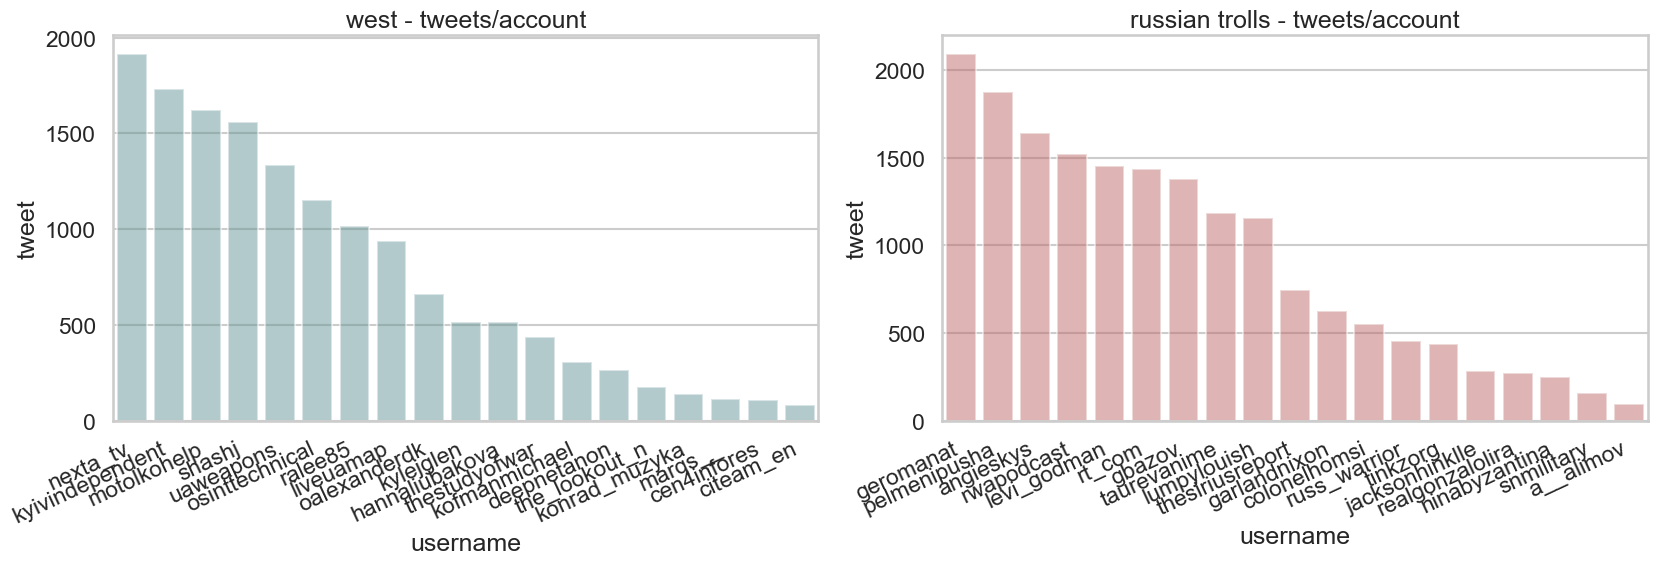

In [331]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17,6))

a = sns.barplot(x = w_tweets_count.index, y = 'tweet', data = w_tweets_count, ax=axs[0], alpha = 0.5, color = 'cadetblue')
a.set_xticklabels(a.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
a.set_title('west - tweets/account')

b = sns.barplot(x = r_tweets_count.index, y = 'tweet', data = r_tweets_count, ax=axs[1], alpha = 0.5, color = 'indianred')
b.set_xticklabels(b.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
b.set_title('russian trolls - tweets/account')
plt.tight_layout()

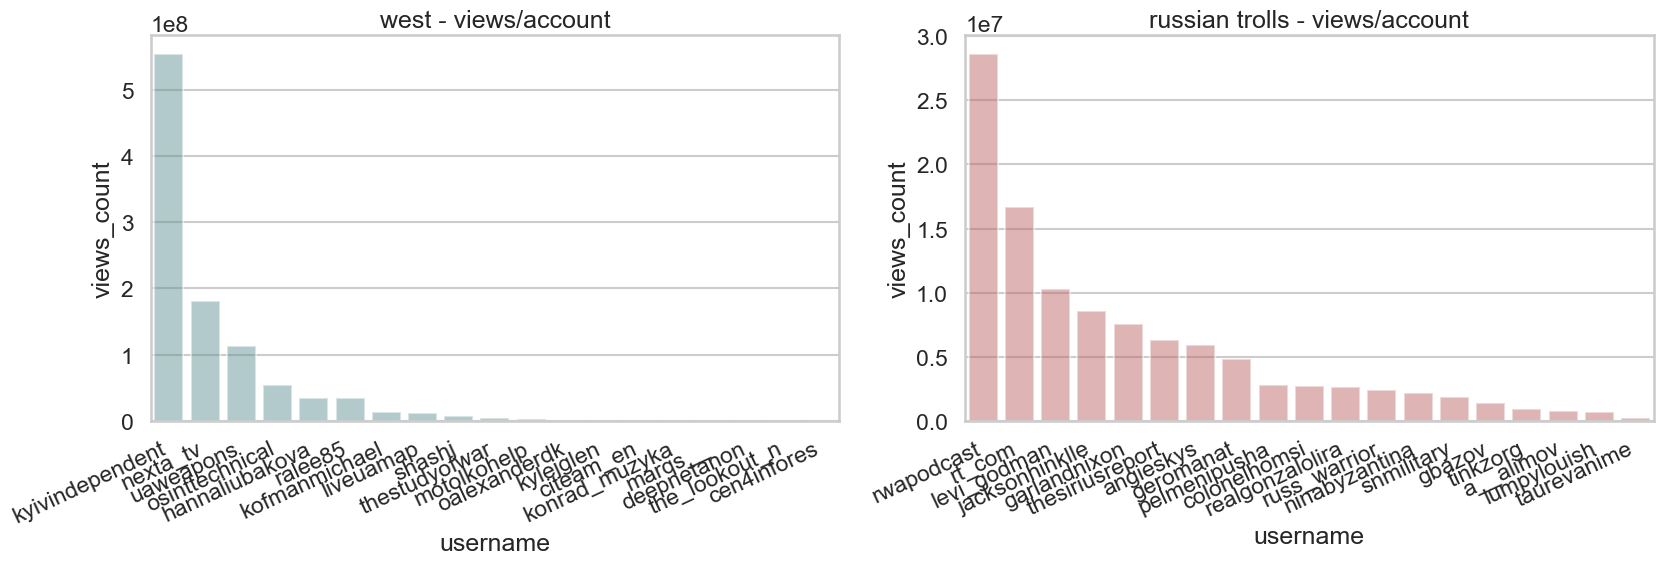

In [332]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17,6))

a = sns.barplot(x = w_views.index, y = 'views_count', data = w_views, ax=axs[0], alpha = 0.5, color = 'cadetblue')
a.set_xticklabels(a.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
a.set_title('west - views/account')

b = sns.barplot(x = r_views.index, y = 'views_count', data = r_views, ax=axs[1], alpha = 0.5, color = 'indianred')
b.set_xticklabels(b.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
b.set_title('russian trolls - views/account')
plt.tight_layout()

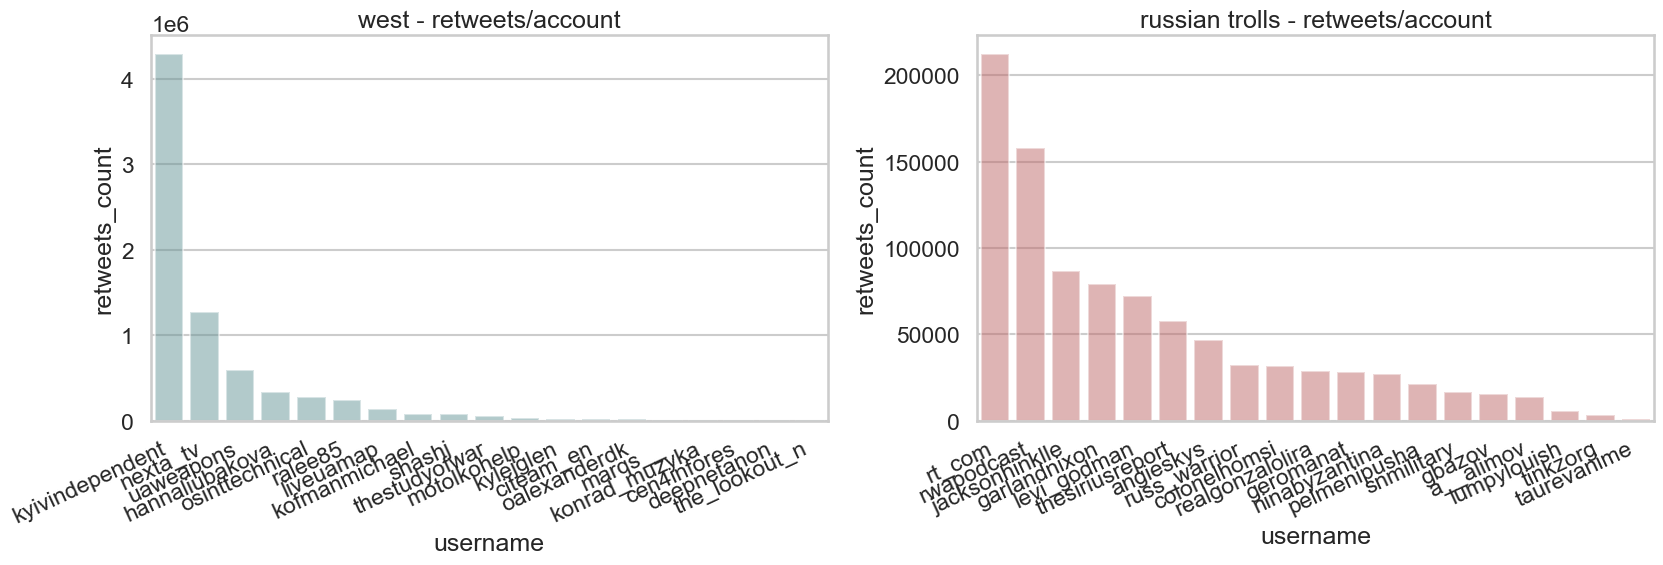

In [333]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17,6))

a = sns.barplot(x = w_retweets.index, y = 'retweets_count', data = w_retweets, ax=axs[0], alpha = 0.5, color = 'cadetblue')
a.set_xticklabels(a.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
a.set_title('west - retweets/account')

b = sns.barplot(x = r_retweets.index, y = 'retweets_count', data = r_retweets, ax=axs[1], alpha = 0.5, color = 'indianred')
b.set_xticklabels(b.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
b.set_title('russian trolls - retweets/account')
plt.tight_layout()

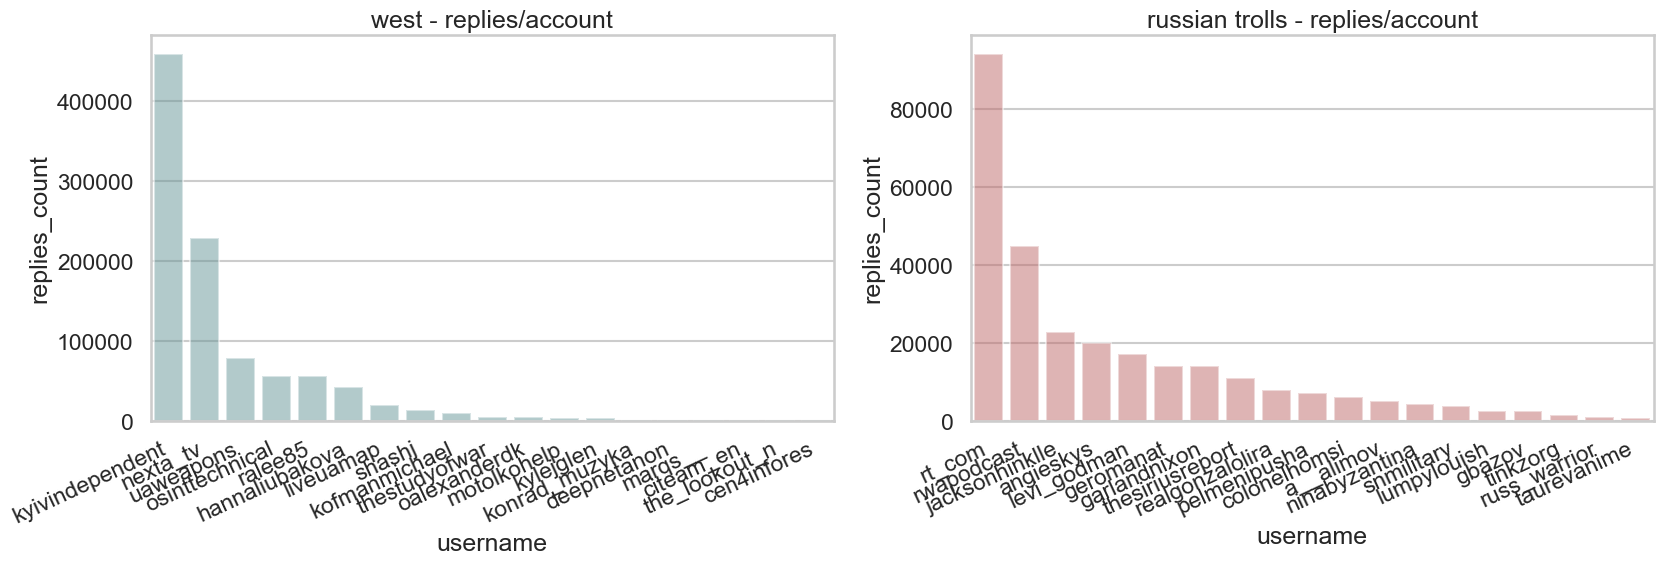

In [334]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17,6))

a = sns.barplot(x = w_replies.index, y = 'replies_count', data = w_replies, ax=axs[0], alpha = 0.5, color = 'cadetblue')
a.set_xticklabels(a.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
a.set_title('west - replies/account')

b = sns.barplot(x = r_replies.index, y = 'replies_count', data = r_replies, ax=axs[1], alpha = 0.5, color = 'indianred')
b.set_xticklabels(b.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
b.set_title('russian trolls - replies/account')
plt.tight_layout()

### Sorting

**West - top 10 most liked tweets**

In [335]:
for tweet in west.sort_values(by = 'likes_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print()

??????BREAKING: Ukraine confirms peace talks with Russia today.

??Switzerland adopts EU sanctions, freezes Putin's assets.  Switzerland broke its historically neutral status to adopt EU sanctions against Russia over its war on Ukraine.

Volodymir @ZelenskyyUa was nominated for the Nobel Peace Prize.  https://t.co/Q8G6qDwWdG

??Hungary now supports cutting Russia off SWIFT.  Hungary was the last EU country who opposed the measure.

??Ukraines Air Force, along with units of the army and territorial defense, destroyed a large Russian military convoy near the city of Bashtanka in Ukraines southern Mykolaiv region.   Military bloggers reported that the convoy contained up to 800 vehicles.

??BREAKING: UN suspends Russia from Human Rights Council.

???Zelensky doesn't believe in the positive outcome of the negotiations with Russia.  "But let them try, so that no citizen of Ukraine doubts that I, as president, tried to stop the war when there was still a chance, however small," he said in 

**Russian trolls - top 10 most liked tweets**

In [336]:
for tweet in r_trolls.sort_values(by = 'likes_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print()

Rand Paul   Do you know who is the greatest propagator of disinformation in the history of the world?  US government.  https://t.co/GfLo0WumlM

US Congress: Flint water supply fix - 9 Billion (can't afford it) Ukraine Weapons - 14 Billion (took 3 days to approved)

looking at what's coming out of ukraine &amp; the west re: the war makes me doubt every historical account of every war ever

India is set to launch a new system to allow it make direct rupee-ruble payments in trade with Russia. It will allow India and Russia to bypass the US dollar in financial transactions, as announced by the president of the FIEO.  Learn more:  https://t.co/kL3MZMytXe  https://t.co/K0QDSlaYZi

BREAKING NEWS: Whitehouse insiders leak that they believe phase one of the war is complete. The German economy is destroyed. Phase 2 includes destroying the economies of France Spain, &amp; the UK  &amp; then moving on to Italy, Greece, etc...

You cant make this shit up.  https://t.co/v6WjnMhMYY

Zelensky is fa

**West - top 10 most retweeted tweets**

In [337]:
for tweet in west.sort_values(by = 'retweets_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print()

??????BREAKING: Ukraine confirms peace talks with Russia today.

??SBU: Intercepted phone calls shows that Russian troops near Kharkiv were ordered to shoot at civilians, including children.

??Mariupol council: Russian occupiers forcibly move thousands of Mariupol residents to Russia.  The civilians were allegedly taken to camps where Russians checked their phones and documents and then forcibly moved some of them to remote cities in Russia.

??Mariupol council: Russian occupiers forcibly move thousands of Mariupol residents to Russia.  The civilians were allegedly taken to camps where Russians checked their phones and documents and then forcibly moved some of them to remote cities in Russia.

??Switzerland adopts EU sanctions, freezes Putin's assets.  Switzerland broke its historically neutral status to adopt EU sanctions against Russia over its war on Ukraine.

??Ukraines Air Force, along with units of the army and territorial defense, destroyed a large Russian military convoy near

**Russian_trolls - top 10 most retweeted tweets**

In [338]:
for tweet in r_trolls.sort_values(by = 'retweets_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print()

Rand Paul   Do you know who is the greatest propagator of disinformation in the history of the world?  US government.  https://t.co/GfLo0WumlM

US Congress: Flint water supply fix - 9 Billion (can't afford it) Ukraine Weapons - 14 Billion (took 3 days to approved)

BREAKING NEWS: Whitehouse insiders leak that they believe phase one of the war is complete. The German economy is destroyed. Phase 2 includes destroying the economies of France Spain, &amp; the UK  &amp; then moving on to Italy, Greece, etc...

India is set to launch a new system to allow it make direct rupee-ruble payments in trade with Russia. It will allow India and Russia to bypass the US dollar in financial transactions, as announced by the president of the FIEO.  Learn more:  https://t.co/kL3MZMytXe  https://t.co/K0QDSlaYZi

You cant make this shit up.  https://t.co/v6WjnMhMYY

Russian store in Germany..  https://t.co/fNBdjcPXPc

BREAKING NEWS: US State department officials leak that when asked what benefit we gain 

**West - top 10 tweets with most replies**

In [339]:
for tweet in west.sort_values(by = 'replies_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print()

An enormous car parade of cars with mostly Russian flags in Berlin, #Germany, today. Reportedly, the parade in support of Russia gathered 5000 cars.  They can't complain about the media blackout in Germany. They have access to information and can see what Russians did in Bucha.  https://t.co/20Oco5p3RB

?? Macron warned against calling Putin a 'butcher.'  I wouldnt use terms like that because Im still in talks with President Putin, the French President said during an interview.  Prior, U.S. President Joe Biden called Putin a butcher, a murderous dictator &amp; a pure thug.

One of the #Russian bloggers cries that in two days her Instagram will stop working  She does not care at all about the thousands of dead people, including her compatriots. Obviously, her biggest worry right now is that she won't be able to post pictures of food from restaurants.  https://t.co/LSdBiSlwHr

?? Putin threatens with immediate strikes against countries that intervene in Russia's war in Ukrain

**Russian trolls - top 10 tweets with most replies**

In [340]:
for tweet in r_trolls.sort_values(by = 'replies_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print()

Russian store in Germany..  https://t.co/fNBdjcPXPc

Number 1 overall draft pick for WW3 #denazification #PushinZ  https://t.co/85uSwr3n2z

Test

Russian TV channels - including RT - have been banned in Poland - local authorities  https://t.co/9gnTsDXWB6

Azov's command at Azovstal is refusing the Russian offer to surrender and instead demands evacuation to a third country by helicopter and also to keep their weapons.

The US threatens to sanction China for not sanctioning Russia   https://t.co/GT2Rangcft

Scott Ritter's twitter account has been eliminated for speaking truth on the Ukraine - Russia war.  https://t.co/N2EsM0MGrH

We say goodbye to our YouTube channels that once were leading news sources, with 10 BILLION views combined - so much for freedom of speech. Meanwhile, Meta goes against its own rules allowing selective calls for violence.  https://t.co/w13nOl6PEP

Youre telling me the billions in US taxpayer dollars that has been sent to Ukraine cant buy them better green scr

### Grouping by date

In [341]:
bydate_w = west.groupby("date").count()
bydate_r = r_trolls.groupby("date").count()

### Tweets/day

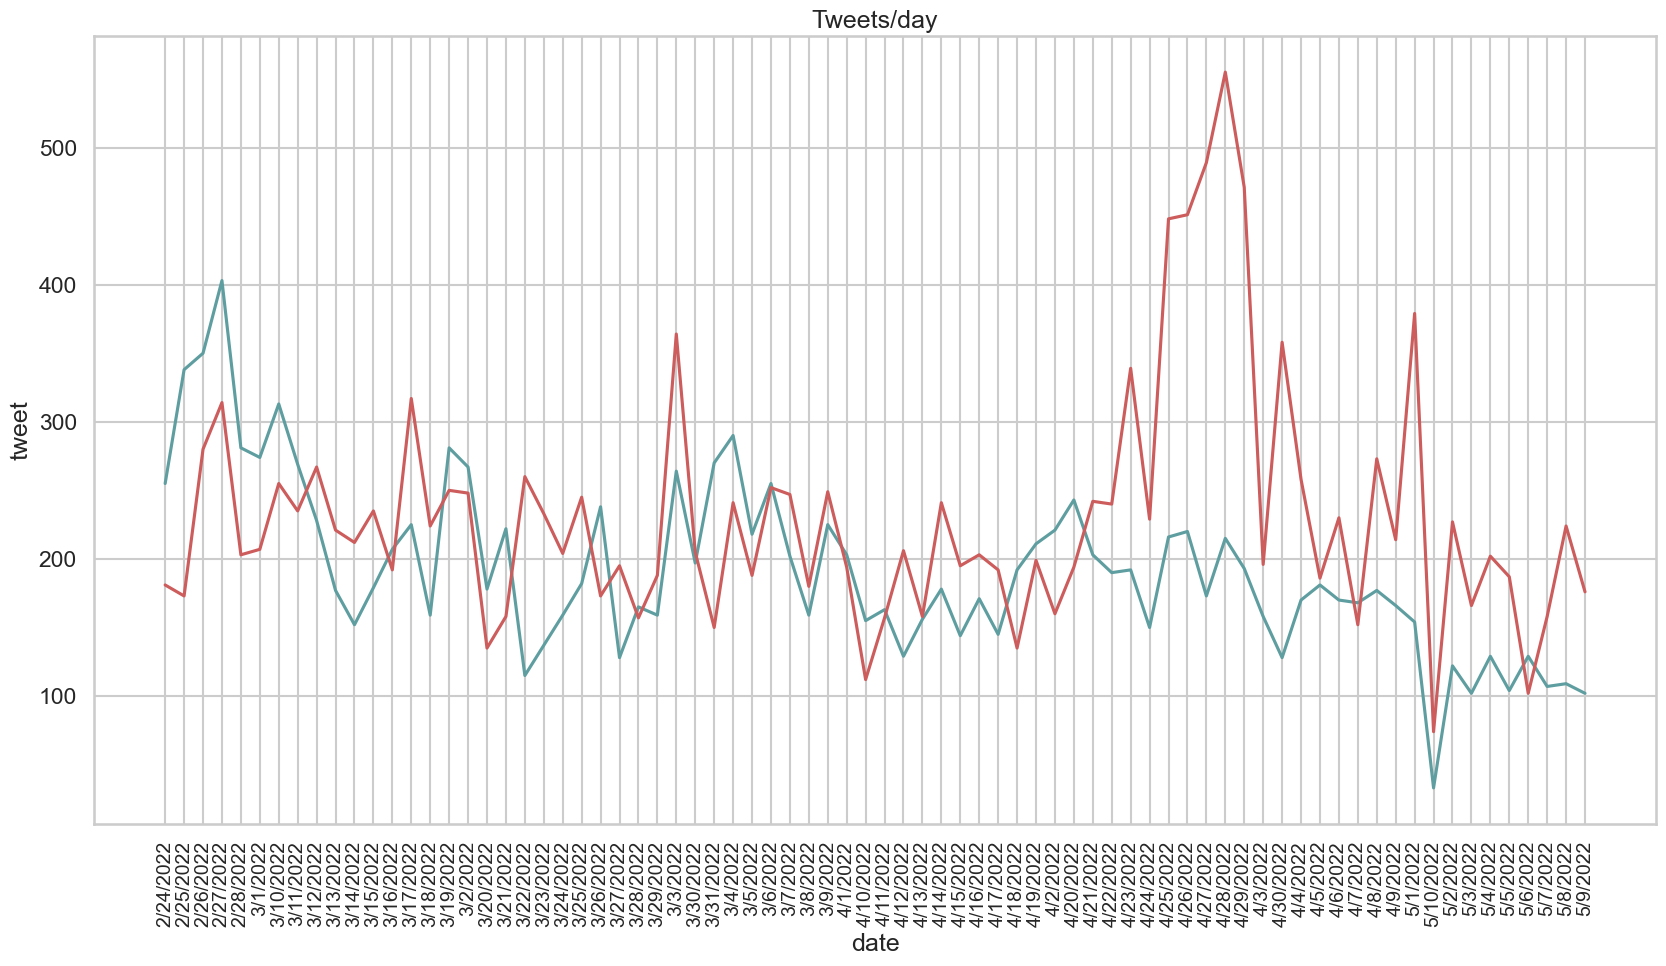

In [342]:
fig = plt.figure(figsize=(17,10))

a = sns.lineplot(x = bydate_w.index, y ='tweet', data = bydate_w, color = 'cadetblue')
a = sns.lineplot(x = bydate_r.index, y ='tweet', data = bydate_r, color = 'indianred', )
a.tick_params(axis='x', rotation=90, labelsize = 14)
a.set_title("Tweets/day")

plt.tight_layout()

### Views/day

In [343]:
bydate_w2 = west.groupby("date").sum()
bydate_r2 = r_trolls.groupby("date").sum()

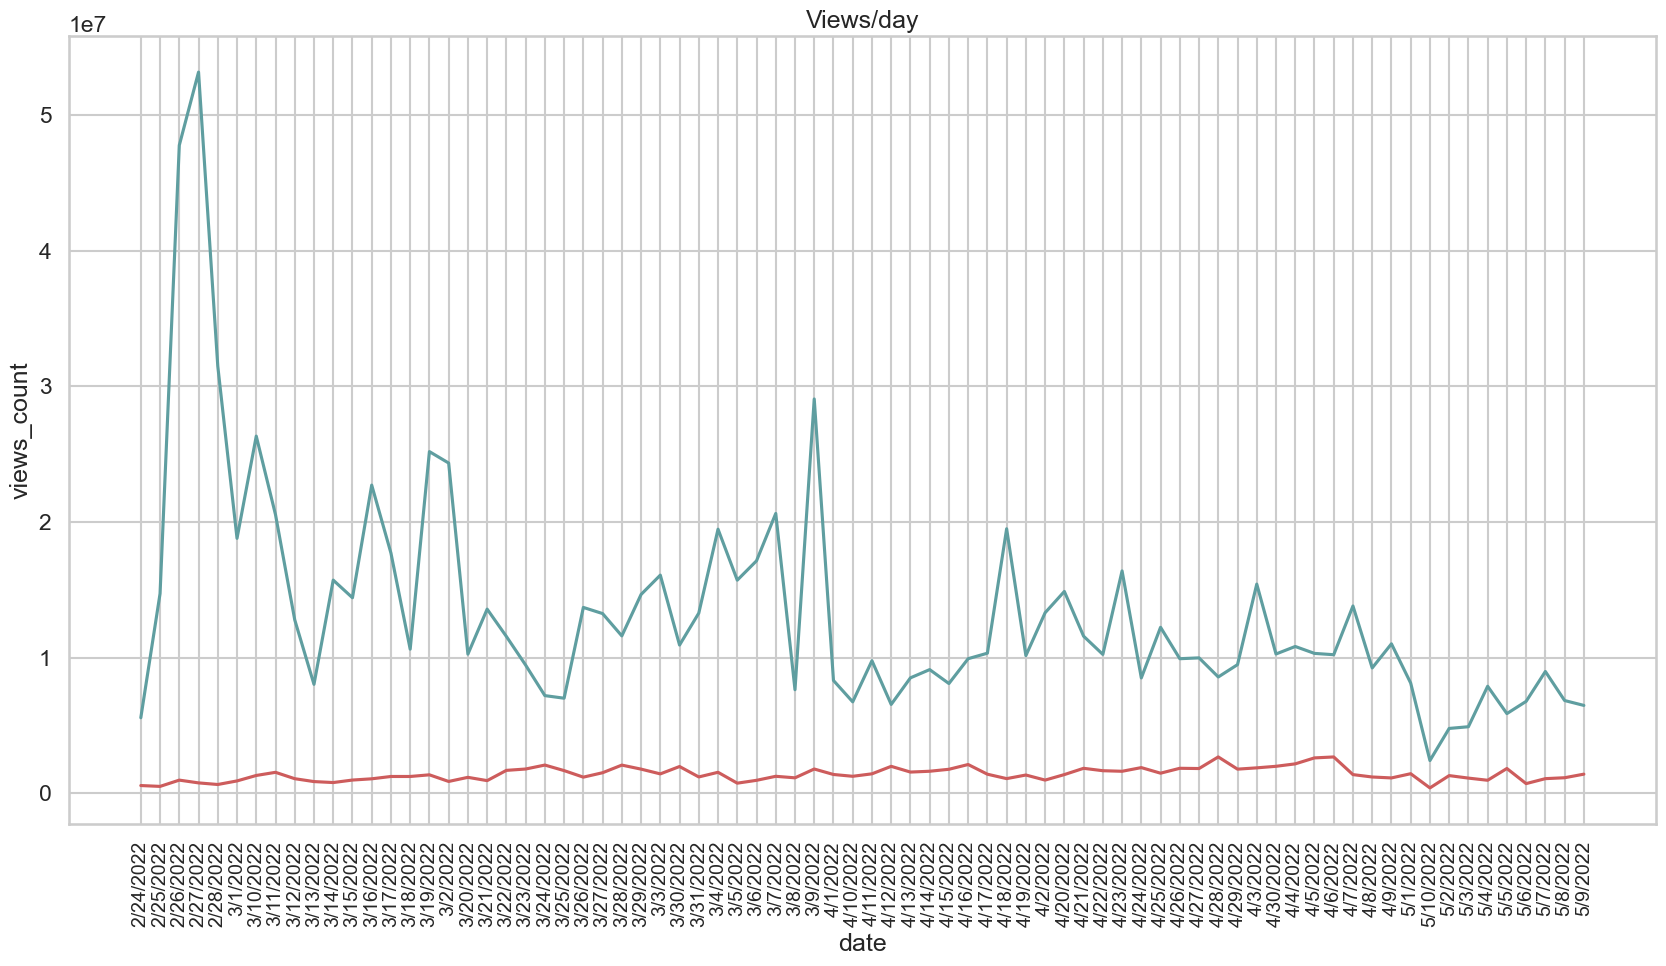

In [344]:
fig = plt.figure(figsize=(17,10))

a = sns.lineplot(x = bydate_w2.index, y ='views_count', data = bydate_w2, color = 'cadetblue')
a = sns.lineplot(x = bydate_r2.index, y ='views_count', data = bydate_r2, color = 'indianred', )
a.tick_params(axis='x', rotation=90, labelsize = 14)
a.set_title("Views/day")

plt.tight_layout()

### Retweets/day

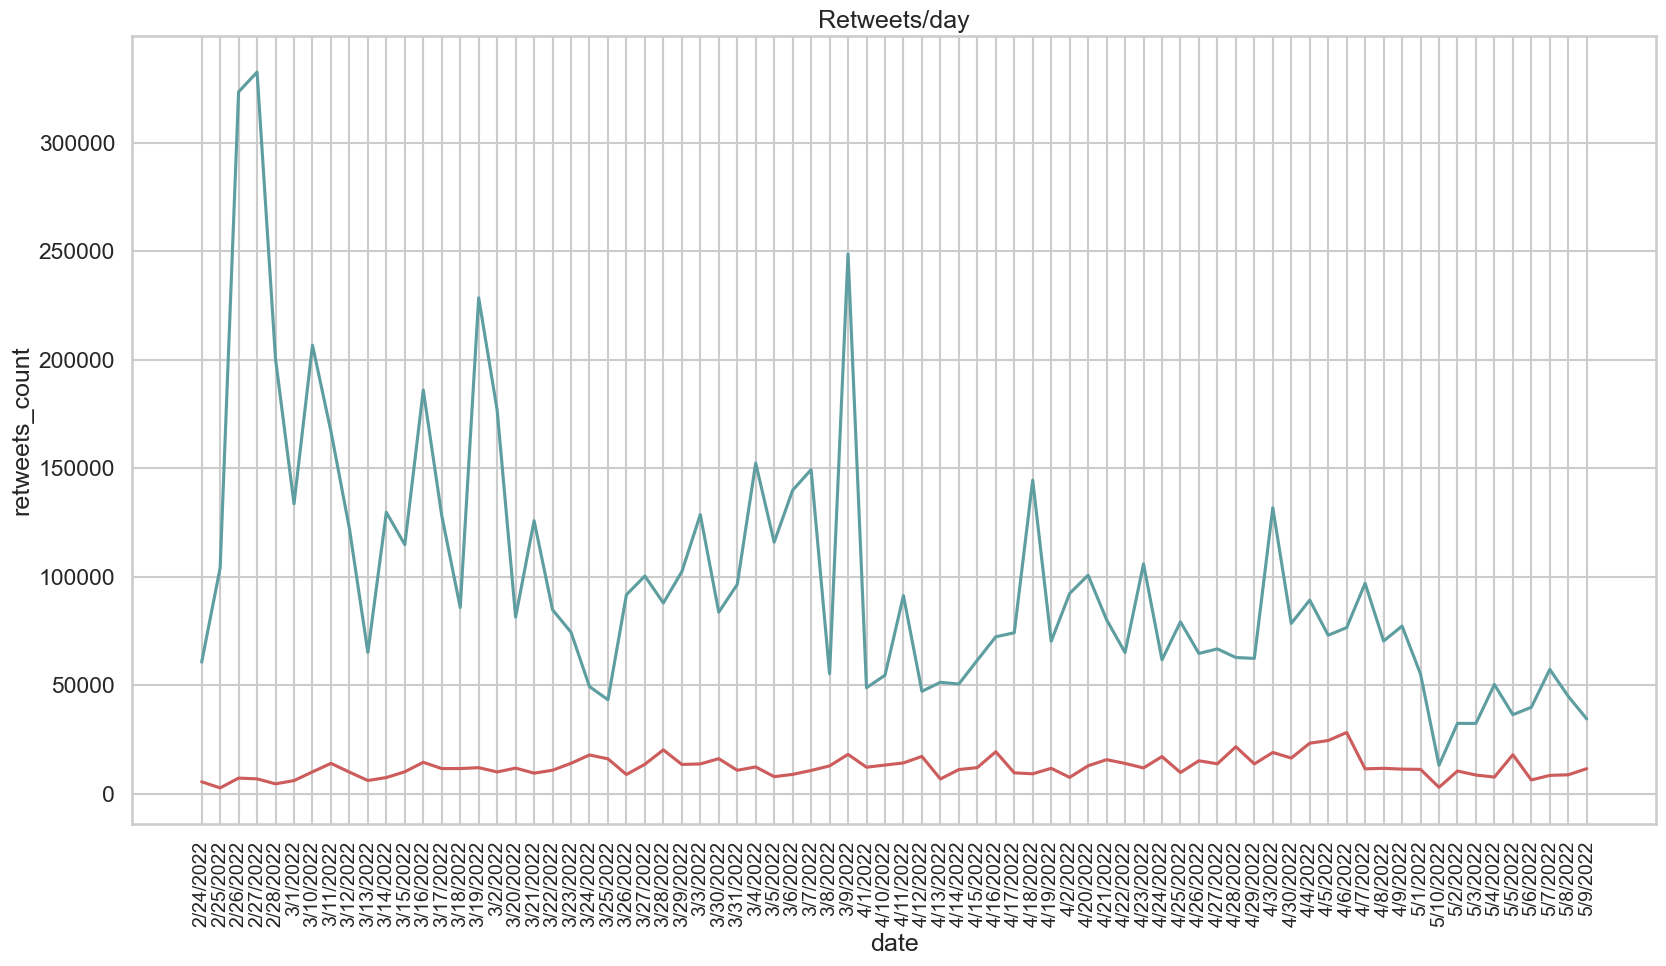

In [346]:
fig = plt.figure(figsize=(17,10))

a = sns.lineplot(x = bydate_w2.index, y ='retweets_count', data = bydate_w2, color = 'cadetblue')
a = sns.lineplot(x = bydate_r2.index, y ='retweets_count', data = bydate_r2, color = 'indianred', )
a.tick_params(axis='x', rotation=90, labelsize = 14)
a.set_title("Retweets/day")

plt.tight_layout()

### Replies/day

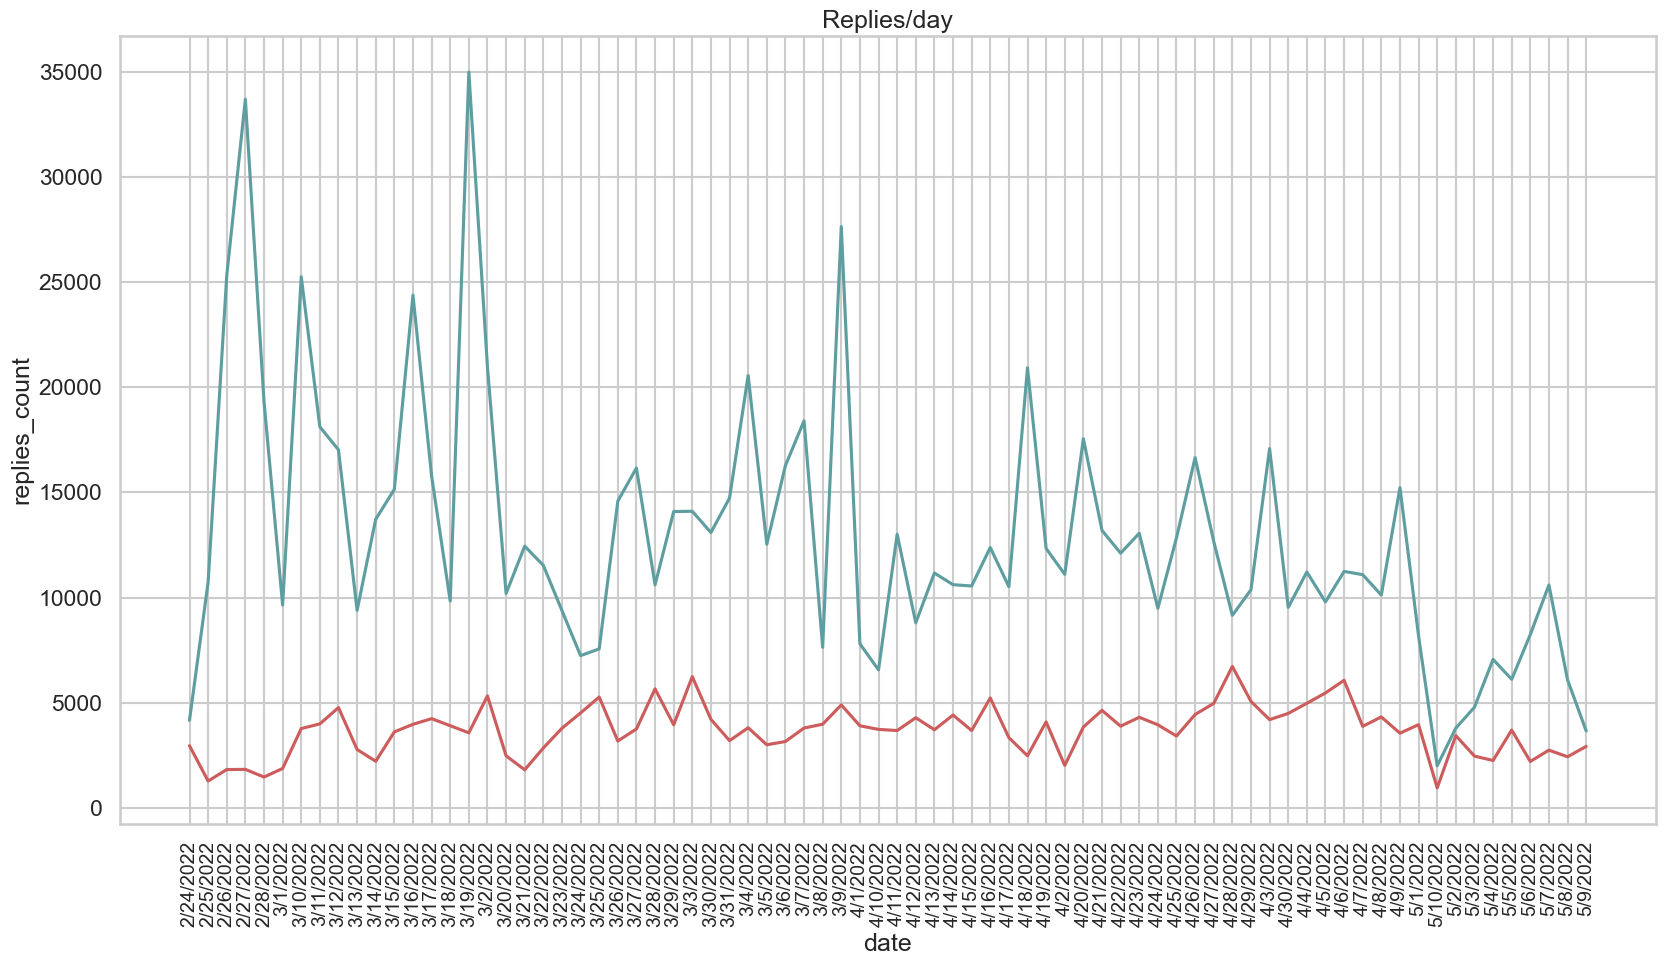

In [347]:
fig = plt.figure(figsize=(17,10))

a = sns.lineplot(x = bydate_w2.index, y ='replies_count', data = bydate_w2, color = 'cadetblue')
a = sns.lineplot(x = bydate_r2.index, y ='replies_count', data = bydate_r2, color = 'indianred', )
a.tick_params(axis='x', rotation=90, labelsize = 14)
a.set_title("Replies/day")

plt.tight_layout()

## Sentiment analysis

### Tweets pre processing

* remove links
* remove @s and #s 
* replace .,!? with "end of sentence" marks to "help" the model

In [348]:
corpus_tweet_w = []
for tweet in west['tweet']:
    corpus_tweet_w.append(tweet)
    
corpus_tweet_r = []
for tweet in r_trolls['tweet']:
    corpus_tweet_r.append(tweet)

In [349]:
corpus_tweet_r

['@ASBMilitary Good luck ??',
 'Ukrainian border guards crossed into Russia in the Bryansk region and Crimea..',
 'Ukrainian air defense systems were suppressed and the military infrastructure of the military air bases was deactivated..',
 '@theragex Guys please tripple check videos before posting them\x85',
 'Peskov: special operation in Ukraine dictated by national interests, no other goals pursued..',
 '@the_xi_balba Pretty good though u ate too much pudding.',
 'Former Ukrainian Deputy Defense Minister Oleksiy Selivanov has called on Ukrainian military personnel, along with defenders of the Donbass Republic, to overthrow the criminal regime in Kiev..',
 'Columns of Ukrainian military vehicles in the center of Kiev at the moment..',
 'Russian Defense Ministry said that no political objects hit the territory of Ukraine, only military infrastructure, nothing threatens the civilian population..',
 'LPR Militia reported the transfer of Ukrainian soldiers to the Lugansk side..',
 'Two Ru

In [351]:
# list of more than 1000 english stopwords; using requests to get the list
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords2 = set(stopwords_list.decode().splitlines())

In [352]:
def tweet_process(tweet):
    tweet = re.sub('[^^a-zA-Z]', ' ', tweet) # repleace everything that is not a-zA-Z with ' ' from data[i]
    tweet = tweet.lower() # lower
    tweet = [word for word in tweet.split() if word not in stopwords2] # remove stopwards but from stopords2 list (not nltk lis)
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    return(tweet)

In [353]:
korpus_w = []
for tweet in corpus_tweet_w:
    korpus_w.append(tweet_process(tweet))
    
korpus_r = []
for tweet in corpus_tweet_r:
    korpus_r.append(tweet_process(tweet))

In [354]:
korpus_r

[['asbmilitary', 'good', 'luck'],
 ['ukrainian',
  'border',
  'guard',
  'crossed',
  'russia',
  'bryansk',
  'region',
  'crimea'],
 ['ukrainian',
  'air',
  'defense',
  'system',
  'suppressed',
  'military',
  'infrastructure',
  'military',
  'air',
  'base',
  'deactivated'],
 ['theragex', 'guy', 'tripple', 'check', 'video', 'posting'],
 ['peskov',
  'special',
  'operation',
  'ukraine',
  'dictated',
  'national',
  'interest',
  'goal',
  'pursued'],
 ['balba', 'pretty', 'good', 'ate', 'pudding'],
 ['ukrainian',
  'deputy',
  'defense',
  'minister',
  'oleksiy',
  'selivanov',
  'called',
  'ukrainian',
  'military',
  'personnel',
  'defender',
  'donbas',
  'republic',
  'overthrow',
  'criminal',
  'regime',
  'kiev'],
 ['column', 'ukrainian', 'military', 'vehicle', 'center', 'kiev', 'moment'],
 ['russian',
  'defense',
  'ministry',
  'political',
  'object',
  'hit',
  'territory',
  'ukraine',
  'military',
  'infrastructure',
  'threatens',
  'civilian',
  'populatio

In [157]:
#nltk.download('twitter_samples')

In [355]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [356]:
print(len(all_positive_tweets))
print(len(all_negative_tweets))
print(type(all_positive_tweets))
print(type(all_negative_tweets[1]))

5000
5000
<class 'list'>
<class 'str'>


In [357]:
print(all_positive_tweets[0])
print(all_negative_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
hopeless for tmr :(


In [358]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [359]:
def create_frequency(tweets, ys):
    
    freq_d = {}
    
    for tweet, y in zip(tweets, ys):
        for word in tweet_process(tweet):
            
            pair = (word, y)
            
            if pair in freq_d:
                freq_d[pair] += 1
            else:
                freq_d[pair] = freq_d.get(pair, 1) 
    
    return freq_d

In [360]:
# testing function

tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]

freq_d = create_frequency(tweets, ys)
print(freq_d)

{('happy', 1): 1, ('tricked', 0): 1, ('sad', 0): 1, ('tired', 0): 2}


In [361]:
# build the freqs dictionary

freqs = create_frequency(train_x, train_y)

In [362]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # TODO: get N_pos and N_get
        if pair[1] > 0:
            N_pos += freqs[(pair)]
            
        else:
            N_neg += freqs[(pair)]
            
    # TODO: calculate the number of documents (tweets)
    D = train_y.shape[0]
    
    # TODO: calculate D_pos, the number of positive documents (tweets)
    D_pos = sum(train_y)
    
    # TODO: calculate D_neg, the number of negative documents (tweets)
    D_neg = D - sum(train_y)
    
    # TODO: calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word, 1), 0)
        freq_neg = freqs.get((word, 0), 0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood

In [363]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
16303


In [364]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''

    # TODO: process the tweet to get a list of words
    word_l = tweet_process(tweet)

    # TODO: initialize probability to zero
    p = 0

    # TODO: add the logprior
    p += logprior

    for word in word_l:

        # TODO: get log likelihood of each keyword
        if  word in loglikelihood:
            p += loglikelihood[word]

    return p

In [365]:
# testing my function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great', 'bad bad bad bad']:
    # print( '%s -> %f' % (tweet, naive_bayes_predict(tweet, logprior, loglikelihood)))
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
#     print(f'{tweet} -> {p:.2f} ({p_category})')
    print(f'{tweet} -> {p:.2f}')

I am happy -> 1.97
I am bad -> -1.28
this movie should have been great. -> 2.00
great -> 2.11
great great -> 4.21
great great great -> 6.32
great great great great -> 8.42
bad bad bad bad -> -5.12


In [366]:
west['tweet'] = west['tweet'].astype('string') 
my_list1 = west['tweet'].tolist()

r_trolls['tweet'] = r_trolls['tweet'].astype('string') 
my_list2 = r_trolls['tweet'].tolist()

In [367]:
p_list1 = []
for tweet in my_list1:
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    p_list1.append(p)
    
df1 = pd.Series(p_list1)
ndf1 = df1.to_frame(name = 'p')

p_list2 = []
for tweet in my_list2:
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    p_list2.append(p)
    
df2 = pd.Series(p_list2)
ndf2 = df2.to_frame(name = 'p')

In [368]:
west['sentiment'] = p_list1
r_trolls['sentiment'] = p_list2

In [369]:
west['sentiment'].describe().transpose()

count    14593.000000
mean        -0.436996
std          2.436401
min        -13.696094
25%         -1.783933
50%         -0.251730
75%          1.019066
max         14.070819
Name: sentiment, dtype: float64

In [370]:
r_trolls['sentiment'].describe().transpose()

count    17610.000000
mean        -0.094512
std          2.056619
min        -14.421538
25%         -1.150438
50%          0.000000
75%          1.003459
max         19.188242
Name: sentiment, dtype: float64

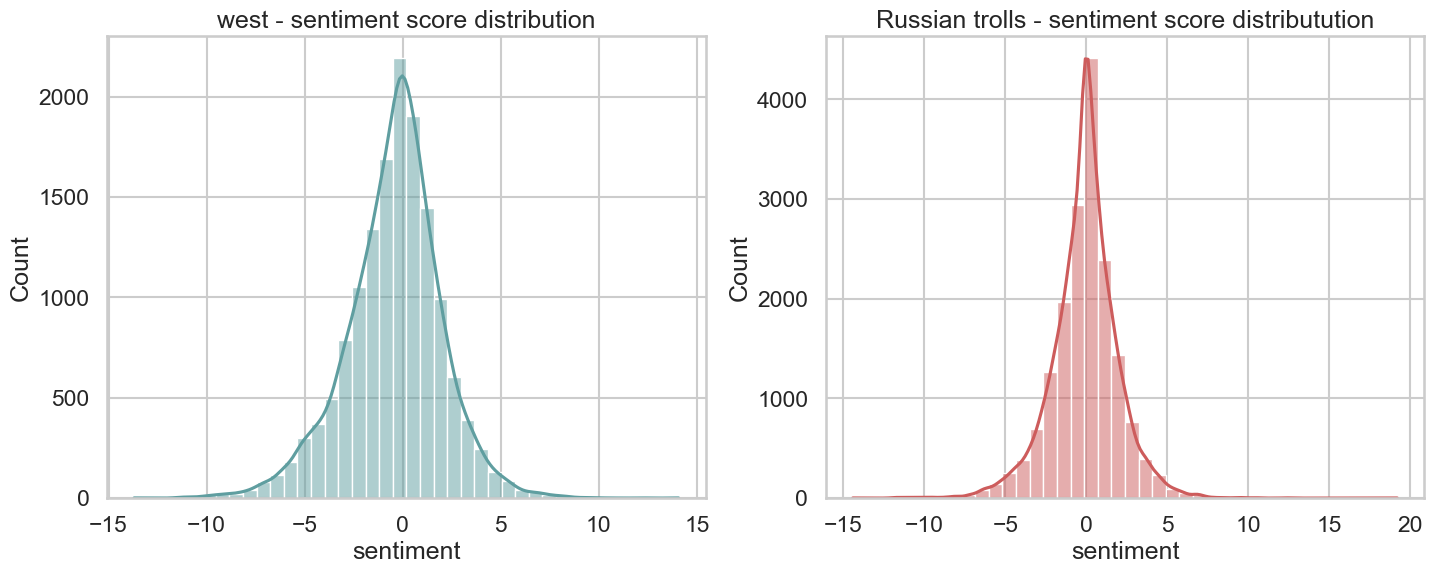

In [371]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17,6))

w = sns.histplot(west['sentiment'], bins=40, color = 'cadetblue', kde = True, ax = axs[0])
w.set_title("west - sentiment score distribution")
r = sns.histplot(r_trolls['sentiment'], bins=40, color = 'indianred', kde = True, ax = axs[1])
r.set_title('Russian trolls - sentiment score distributution')
plt.show()

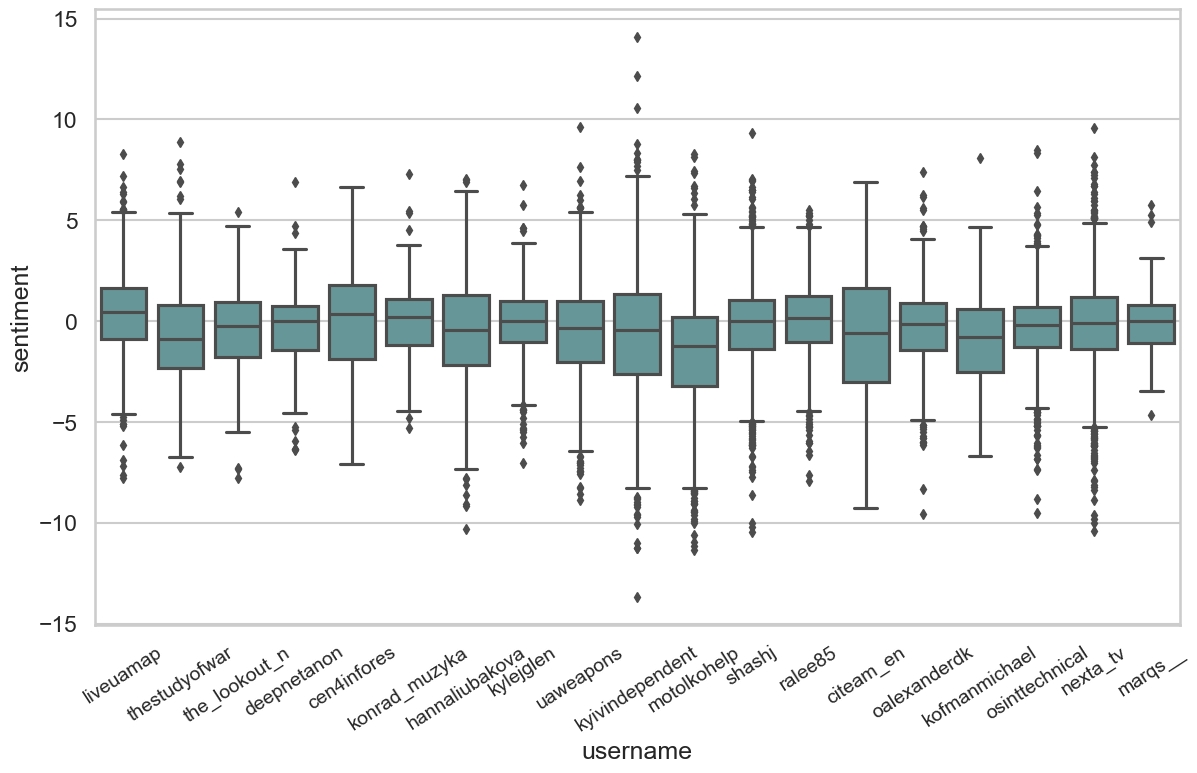

In [372]:
fig = plt.figure(figsize=(14,8))
a = sns.boxplot(x="username", y="sentiment", data=west, color='cadetblue')
a.tick_params(axis='x', rotation=33, labelsize = 14)
plt.show()

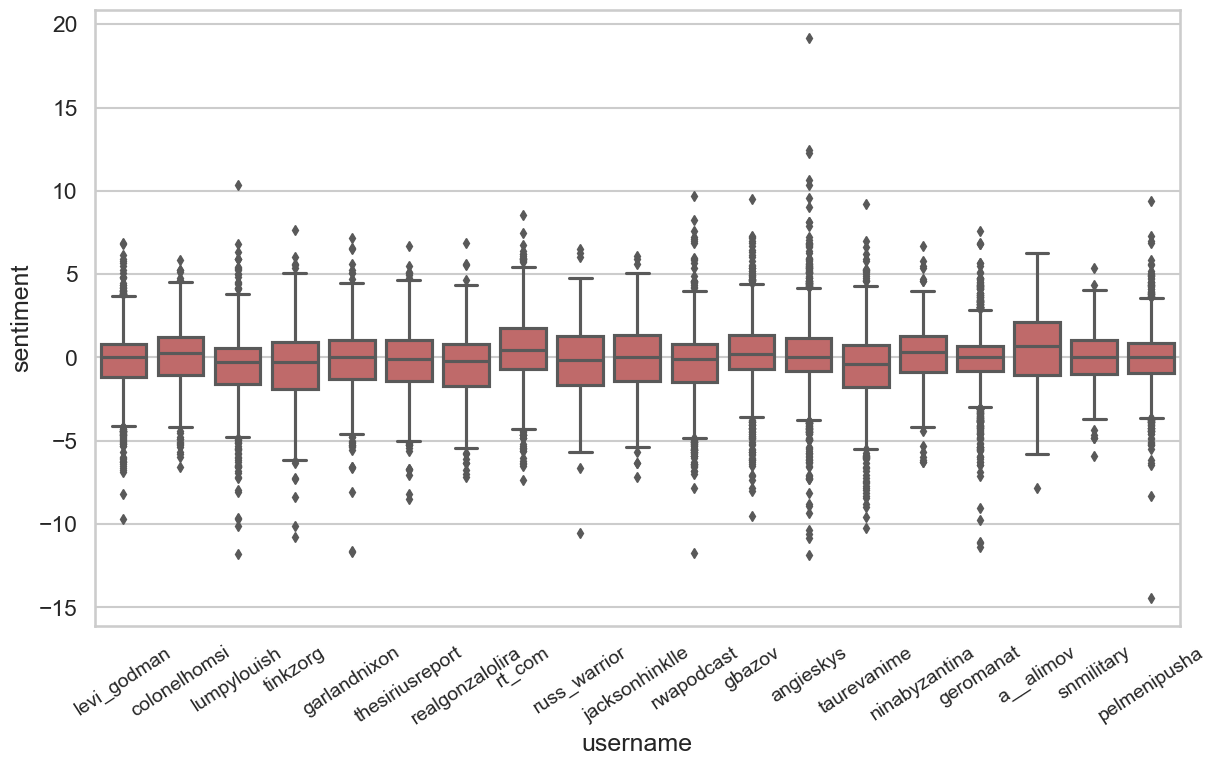

In [373]:
fig = plt.figure(figsize=(14,8))
a = sns.boxplot(x="username", y="sentiment", data=r_trolls, color='indianred')
a.tick_params(axis='x', rotation=33, labelsize = 14)
plt.show()

# Daily summarization

In [290]:
date_w  = west[west['date'] == '2/24/2022']
date_r  = r_trolls[r_trolls['date'] == '2/24/2022']

In [291]:
text_w = ''
for tweet in date_w['tweet']:
    text_w += tweet
    
text_r = ''
for tweet in date_r['tweet']:
    text_r += tweet

### Pre processing

In [292]:
text_w = re.sub(r"http\S+", "", text_w)
text_w = text_w.replace("@", "")
text_w = text_w.replace("#", "")
text_w = text_w.replace(".", ".<eos>")
text_w = text_w.replace("!", ".<eos>")
text_w = text_w.replace("?", ".<eos>")

sentences_w = text_w.split("<eos>")

new_sentences_w = []
for sen in sentences_w:
    if len(sen) < 5:
        continue
    else:
        new_sentences_w.append(re.sub(' +', ' ', sen)) # remove extra spaces

In [293]:
text_r = re.sub(r"http\S+", "", text_r)
text_r = text_r.replace("@", "")
text_r = text_r.replace("#", "")
text_r = text_r.replace(".", ".<eos>")
text_r = text_r.replace("!", ".<eos>")
text_r = text_r.replace("?", ".<eos>")

sentences_r = text_r.split("<eos>")

new_sentences_r = []
for sen in sentences_r:
    if len(sen) < 5:
        continue
    else:
        new_sentences_r.append(re.sub(' +', ' ', sen)) # remove extra spaces

In [294]:
new_sentences_r

[' President Vladimir Putin: We have to take bold and immediate action.',
 ' The People\x92s Republics of Donbass have asked Russia for help.',
 ' In accordance with Article 51 of the UN Charter I made a decision to carry out a special military operation.',
 ' Vladimir Putin: Over the past 30 years we have been patiently trying to come to an agreement with NATO regarding the principles of equal and indivisible security in Europe.',
 ' In response, we faced either cynical deception and lies or attempts at pressure and blackmail.',
 ' Putin: For 8 years Russia has been doing everything possible to settle the situation by peaceful means.',
 ' Everything was in vain.',
 ' It became impossible to tolerate.',
 ' We had to stop the atrocity &amp; genocide of millions of people in Donbass who pinned their hopes on Russia.',
 ' Vladimir Putin: A veritable \x93empire of lies\x94 has been created inside the US in recent years.',
 ' All its satellites not only obediently say yes to and parrot it a

In [295]:
from transformers import pipeline

summarizer = pipeline("summarization")

max_chunk = 500
current_chunk = 0 
chunks = []
for sentence in new_sentences_w:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


0


In [296]:
summarizer2 = pipeline("summarization")

max_chunk = 500
current_chunk = 0 
chunks_r = []
for sentence in new_sentences_r:
    if len(chunks_r) == current_chunk + 1: 
        if len(chunks_r[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks_r[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks_r.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks_r.append(sentence.split(' '))

for chunk_id in range(len(chunks_r)):
    chunks_r[chunk_id] = ' '.join(chunks_r[chunk_id])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


0


In [297]:
result_w = summarizer(chunks, max_length=120, min_length=30, do_sample=False)

In [298]:
result_r = summarizer2(chunks_r, max_length=120, min_length=30, do_sample=False)

Your max_length is set to 120, but you input_length is only 44. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


In [299]:
result_w

[{'summary_text': ' UN Security Council to hold emergency session on Ukraine Wednesday night, diplomats say . Secretary of state Blinken believes Russia will invade Ukraine before the night is over . Ukraine FM Kuleba: Putin has just launched a full-scale invasion of Ukraine. Peaceful Ukrainian cities are under strikes. This is a war of aggression .'},
 {'summary_text': ' Both Russia and Belarus has been blocked from website . President of Belarus gave orders to his army to integrate and cooperate with the Russian army in the invasion of Ukraine . Russia targeted airports, and some strikes failed .'},
 {'summary_text': ' Prime Minister Johnson is chairing a emergency COBR meeting to decide the UK\'s response to the "horrific attacks" by Russia . Ministry of Internal Affairs of Ukraine has published pictures of the border service facilities in the Kyiv region that were shot by Russian troops .'},
 {'summary_text': ' Ukrainian traffic cam catches what seems like 2 x Russian Su-25 passing

In [300]:
result_r

[{'summary_text': " Putin: 'We have to take bold and immediate action. The People\x92s Republics of Donbass have asked Russia for help. In accordance with Article 51 of the UN Charter I made a decision to carry out a special military operation' Putin: For the US &amp; its allies, it is a policy of containing Russia, with obvious geopolitical dividends ."},
 {'summary_text': " Russian flag was raised in Kakhovka, in the Kherson region . President Vladimir Putin and Prime Minister ImranKhanPTI held a meeting in Moscow . LPR People's Militia stated that the soldiers of the 57th Separate Motorized Infantry Brigade of the Armed Forces of Ukraine voluntarily laid down their arms ."},
 {'summary_text': " Putin: Focused on their own goals, leading NATO countries are supporting far-right nationalists and neo-Nazis in Ukraine . Lybia didn't threat a single NATO member, nor Iraq, nor Yugoslavia.  Article 5 is for members.  Not even Afganistan posed a threat.  NATO didn't admit Ukraine in for a re

In [301]:
Summary_west = ''
for i in range(len(result_w)):
    Summary_west += result_w[i]['summary_text']
    
Summary_west

' UN Security Council to hold emergency session on Ukraine Wednesday night, diplomats say . Secretary of state Blinken believes Russia will invade Ukraine before the night is over . Ukraine FM Kuleba: Putin has just launched a full-scale invasion of Ukraine. Peaceful Ukrainian cities are under strikes. This is a war of aggression . Both Russia and Belarus has been blocked from website . President of Belarus gave orders to his army to integrate and cooperate with the Russian army in the invasion of Ukraine . Russia targeted airports, and some strikes failed . Prime Minister Johnson is chairing a emergency COBR meeting to decide the UK\'s response to the "horrific attacks" by Russia . Ministry of Internal Affairs of Ukraine has published pictures of the border service facilities in the Kyiv region that were shot by Russian troops . Ukrainian traffic cam catches what seems like 2 x Russian Su-25 passing low over a Russian convoy in the Kherson region . Large Russian air assault operation 

In [302]:
Summary_trolls = ''
for i in range(len(result_r)):
    Summary_trolls += result_r[i]['summary_text']
    
Summary_trolls

" Putin: 'We have to take bold and immediate action. The People\x92s Republics of Donbass have asked Russia for help. In accordance with Article 51 of the UN Charter I made a decision to carry out a special military operation' Putin: For the US &amp; its allies, it is a policy of containing Russia, with obvious geopolitical dividends . Russian flag was raised in Kakhovka, in the Kherson region . President Vladimir Putin and Prime Minister ImranKhanPTI held a meeting in Moscow . LPR People's Militia stated that the soldiers of the 57th Separate Motorized Infantry Brigade of the Armed Forces of Ukraine voluntarily laid down their arms . Putin: Focused on their own goals, leading NATO countries are supporting far-right nationalists and neo-Nazis in Ukraine . Lybia didn't threat a single NATO member, nor Iraq, nor Yugoslavia.  Article 5 is for members.  Not even Afganistan posed a threat.  NATO didn't admit Ukraine in for a reason.  Keeping Germany under control was worthwhile killing Ukra